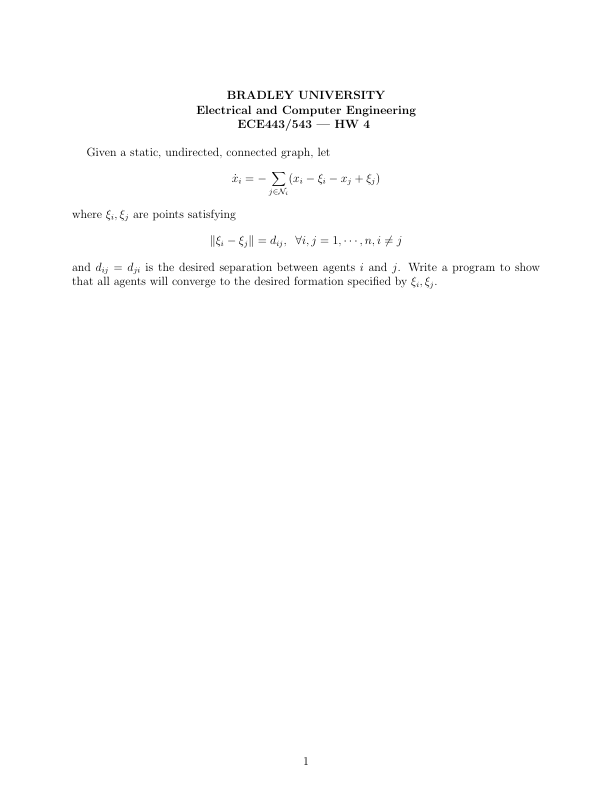

In [2]:
import fitz  # PyMuPDF
from IPython.display import display, Image

def display_pdf_images(pdf_path):
    # Open the PDF file
    pdf_document = fitz.open(pdf_path)
    
    # Display each page as an image
    for page_num in range(pdf_document.page_count):
        page = pdf_document.load_page(page_num)
        image_bytes = page.get_pixmap().tobytes()
        display(Image(data=image_bytes))

# Call the function with the path to your PDF file
display_pdf_images("hw4.pdf")

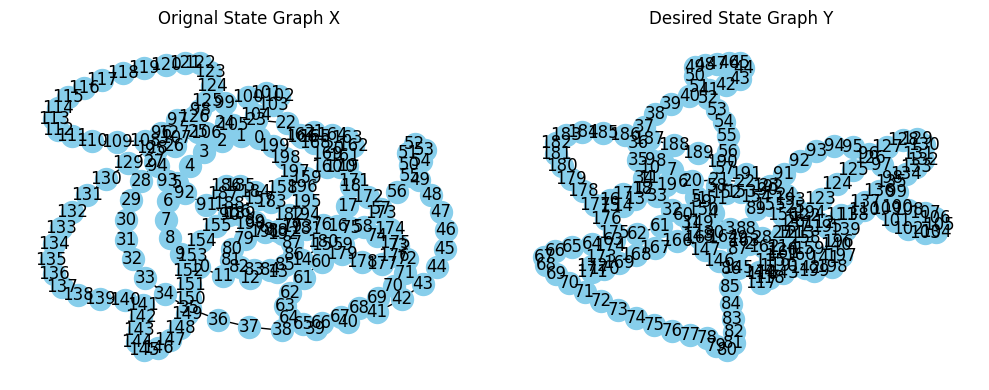

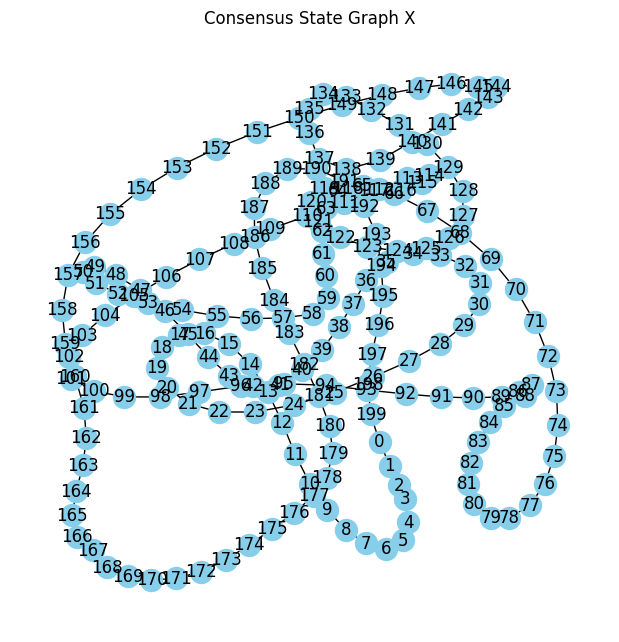

In [56]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def AgentGen(N):
    
    X = nx.Graph()   # generate a undirected graph with N nodes
    
    for i in range(N):   # add nodes in the graph
        x_pos = np.random.rand() * 10  # Random x-coordinate between 0 and 10
        y_pos = np.random.rand() * 10  # Random y-coordinate between 0 and 10
        X.add_node(i, pos=(x_pos, y_pos))
    
    for i in range(N - 1):   # connect the nodes together
        X.add_edge(i, i + 1)
    X.add_edge(N - 1, 0)   # connect last node to first node
    return X
    
def DesiredGen(N, state):
    
    X = nx.Graph()

    if state == "Square":
        side_length = int(np.sqrt(N))  # Calculate side length of the square
        for i in range(side_length):
            for j in range(side_length):
                if i * side_length + j < N:
                    x_pos = j
                    y_pos = -i
                    X.add_node(i * side_length + j, pos=(x_pos, y_pos))

    elif state == "Circle":
        radius = 5  # Radius of the circle
        theta = np.linspace(0, 2*np.pi, N, endpoint=False)
        for i in range(N):
            x_pos = radius * np.cos(theta[i])
            y_pos = radius * np.sin(theta[i])
            X.add_node(i, pos=(x_pos, y_pos))
            
    # Connect each node to its neighboring nodes to ensure connectivity
        for i in range(N):
            X.add_edge(i, (i + 1) % N)
            
    elif state == "Hexagon":
        side_length = int(np.ceil(np.sqrt(N)))  # Calculate side length of the hexagon
        for i in range(side_length):
            for j in range(side_length):
                if i * side_length + j < N:
                    x_pos = j * np.sqrt(3)
                    y_pos = -i * 1.5
                    if j % 2 == 1:  # Shift every other row
                        y_pos -= 0.75
                    X.add_node(i * side_length + j, pos=(x_pos, y_pos))

    elif state == "Rectangle":
        rows = int(np.ceil(N / 3))  # Number of rows in the rectangle
        for i in range(rows):
            for j in range(3):
                if i * 3 + j < N:
                    x_pos = j * 3
                    y_pos = -i
                    X.add_node(i * 3 + j, pos=(x_pos, y_pos))

    return X

def Consensus(X, E_i, E_j, iter_num):
    
    for _ in range(iter_num):
        for i in range(X.number_of_nodes()):
            
            xi = np.array(E_i[i])  # Desired position of agent i
            
            neighbors = list(X.neighbors(i))  # Get neighbors of agent i
            
            # Compute the consensus update for agent i
            x_dot_i = np.zeros(2)
            
            for j in neighbors:
                
                xj = np.array(E_j[j])  # Desired position of neighbor j
                x_diff = np.array(X.nodes[i]['pos']) - xi - np.array(X.nodes[j]['pos']) + xj
                x_dot_i += -x_diff
            
            # Update the position of agent i
            X.nodes[i]['pos'] += x_dot_i
    
    return X  # Return the modified graph X

def plot_graph(graph, ax, title):
    nx.draw(graph, with_labels=True, node_size=250, node_color='skyblue', ax=ax)
    ax.set_title(title)


def main():

    num = 5
    
    # lets create E_i and E_j
    Y = DesiredGen(num, "Circle")

    # Let's create E_i and E_j based on the positions of nodes in graph Y
    E_i = []
    E_j = []

    # Extract positions of nodes in Y
    for _, pos in Y.nodes(data='pos'):
        E_i.append(pos)

    # Assuming E_j = E_i
    E_j = E_i.copy()
    
    # Generate Random Agents
    X = AgentGen(num)
    
    # Create figure and axes for before consensus
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))  
    plot_graph(X, axes[0], 'Orignal State Graph X')
    plot_graph(Y, axes[1], 'Desired State Graph Y')
    plt.tight_layout()
    plt.show()


    X = Consensus(X, E_i, E_j, 10000)
   

    # Plot the consensus state
    plt.figure(figsize=(6, 6))
    nx.draw(X, with_labels=True, node_size=250, node_color='skyblue')
    plt.title('Consensus State Graph X')
    plt.show()

    
      
if __name__ == "__main__":
    main()